# 결정 트리
- 다양한 특성이 있는데 상관 관계가 없을 때 트리를 만들어 질문을 주고 그 질문에 맞는지 확인해보는 형식이다.

In [33]:
import pandas as pd
r_wine = pd.read_csv('data/winequality-red.csv', sep = ';')
w_wine = pd.read_csv('data/winequality-white.csv', sep = ';')

In [34]:
r_wine = r_wine[['alcohol', 'residual sugar', 'pH']]
r_wine['class'] = 0
r_wine.rename(columns={'residual sugar': 'sugar'}, inplace = True)
r_wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0
1,9.8,2.6,3.20,0
2,9.8,2.3,3.26,0
3,9.8,1.9,3.16,0
4,9.4,1.9,3.51,0
...,...,...,...,...
1594,10.5,2.0,3.45,0
1595,11.2,2.2,3.52,0
1596,11.0,2.3,3.42,0
1597,10.2,2.0,3.57,0


In [35]:
w_wine = w_wine[['alcohol', 'residual sugar', 'pH']]
w_wine['class'] = 1
w_wine.rename(columns={'residual sugar': 'sugar'}, inplace = True)
w_wine

,alcohol,sugar,pH,class
0,8.8,20.7,3.00,1
1,9.5,1.6,3.30,1
2,10.1,6.9,3.26,1
3,9.9,8.5,3.19,1
4,9.9,8.5,3.19,1
...,...,...,...,...
4893,11.2,1.6,3.27,1
4894,9.6,8.0,3.15,1
4895,9.4,1.2,2.99,1
4896,12.8,1.1,3.34,1


In [36]:
wine = pd.concat([r_wine, w_wine])
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0
1,9.8,2.6,3.20,0
2,9.8,2.3,3.26,0
3,9.8,1.9,3.16,0
4,9.4,1.9,3.51,0
...,...,...,...,...
4893,11.2,1.6,3.27,1
4894,9.6,8.0,3.15,1
4895,9.4,1.2,2.99,1
4896,12.8,1.1,3.34,1


In [37]:
data = wine[['alcohol', 'sugar', 'pH']]
target = wine[['class']]

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target)

In [38]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [39]:
# 로지스틱 회귀로 했지만 확률이 좋지는 않다.

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7789408866995073
0.7827692307692308


C:\Users\seong\OneDrive - 한성대학교\바탕 화면\공부\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
# 트리

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=50)
# dt.fit(train_scaled, train_target)
dt.fit(train_input, train_target)

# print(dt.score(train_scaled, train_target))
# print(dt.score(test_scaled, test_target))
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.9981527093596059
0.8572307692307692


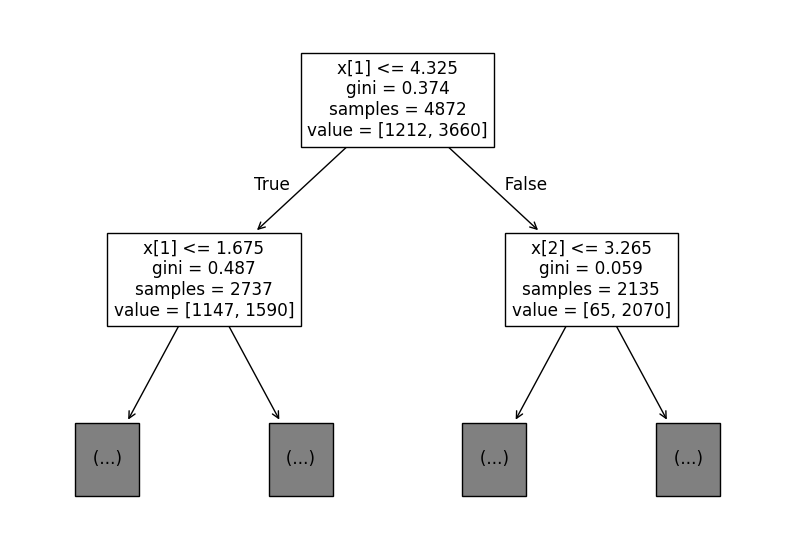

In [41]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (10, 7))
plot_tree(dt, max_depth = 1)
plt.show()